In [1]:
import sys, os, csv, h5py
sys.path.append('..')
import pandas as pd
import numpy as np

In [2]:
#del sys.modules['tools.instruments']
from tools.instruments import instruments
from tools.constants import SRF_ROLLOVER_BO_CSV_PATH, SRF_ROLLOVER_BV_CSV_PATH,\
                              SRF_CONTINUOUS_BO_DB_PATH, SRF_CONTINUOUS_BV_DB_PATH
from tools.visualisation import view

In [10]:
method='bv'
if method == 'bv':
    file = h5py.File(SRF_CONTINUOUS_BV_DB_PATH, 'w')
if method =='bo':
    file = h5py.File(SRF_CONTINUOUS_BO_DB_PATH, 'w')

In [11]:
fields = ['open','high','low','close']
# numpy array datatypes
dtypes= np.dtype([
        ('date', 'i'),
        ('open', 'f'),
        ('high','f'),
        ('low','f'),
        ('close','f'),
        ('volume', 'i'),
        ('open_interest','i')
    ])

for instrument in instruments.values():
    if not instrument.contracts:
        print(f"{instrument.name}은 대상 상품이 아님")
        continue
    print(f"{instrument.name}: {method} 방식으로 연결")
        
    rolls = instrument.rolldates(method = method)
    data = pd.DataFrame()
    for roll in rolls:
        code, start, diff = roll[1], roll[2], float(roll[5])
        end = roll[3] if roll[3] else None

        quotes = instrument.quotes(contract=code)[start:end]

        if len(data) > 0:
            data[fields] = data[fields]+ diff
        data = pd.concat([data, quotes])
        
    data.reset_index(inplace=True)
    data['date'] = data['date'].values.astype('M8[D]').astype('i')
    data = np.array(list(map(tuple, data.values)), dtypes)
    file.create_dataset(instrument.symbol, data=data)
    
print('DOne')
file.close()

CME Australian Dollar AUD: bv 방식으로 연결
SHFE Aluminium은 대상 상품이 아님
ICE Rotterdam Coal은 대상 상품이 아님
ICE Brent Crude Oil은 대상 상품이 아님
CBOT Soybean Oil: bv 방식으로 연결
CME British Pound GBP: bv 방식으로 연결
CBOT Corn: bv 방식으로 연결
ICE Cocoa: bv 방식으로 연결
CME Canadian Dollar CAD: bv 방식으로 연결
NYMEX WTI Crude Oil: bv 방식으로 연결
ICE Cotton: bv 방식으로 연결
SHFE Copper은 대상 상품이 아님
CME Class III Milk은 대상 상품이 아님
ICE US Dollar Index: bv 방식으로 연결
CME Euro FX: bv 방식으로 연결
CME Eurodollar: bv 방식으로 연결
CME S&P 500 Index E-Mini: bv 방식으로 연결
EUREX Euro-BTP은 대상 상품이 아님
EUREX DAX은 대상 상품이 아님
EUREX EURO STOXX 50 Index은 대상 상품이 아님
CME 30 Day Federal Funds Futures: bv 방식으로 연결
EUREX Euro-Bund은 대상 상품이 아님
EUREX Euro-Bobl은 대상 상품이 아님
EUREX Euro-Schatz은 대상 상품이 아님
EUREX Euro-OAT은 대상 상품이 아님
CBOT 5-year US Treasury Note: bv 방식으로 연결
ICE Gasoil: bv 방식으로 연결
NYMEX Gold: bv 방식으로 연결
COMEX Copper: bv 방식으로 연결
NYMEX Heating Oil: bv 방식으로 연결
LIFFE EURIBOR은 대상 상품이 아님
CME Japanese Yen JPY: bv 방식으로 연결
ICE Coffee C: bv 방식으로 연결
CME Kansas City Wheat: bv 방식으로 연결
LIFFE S

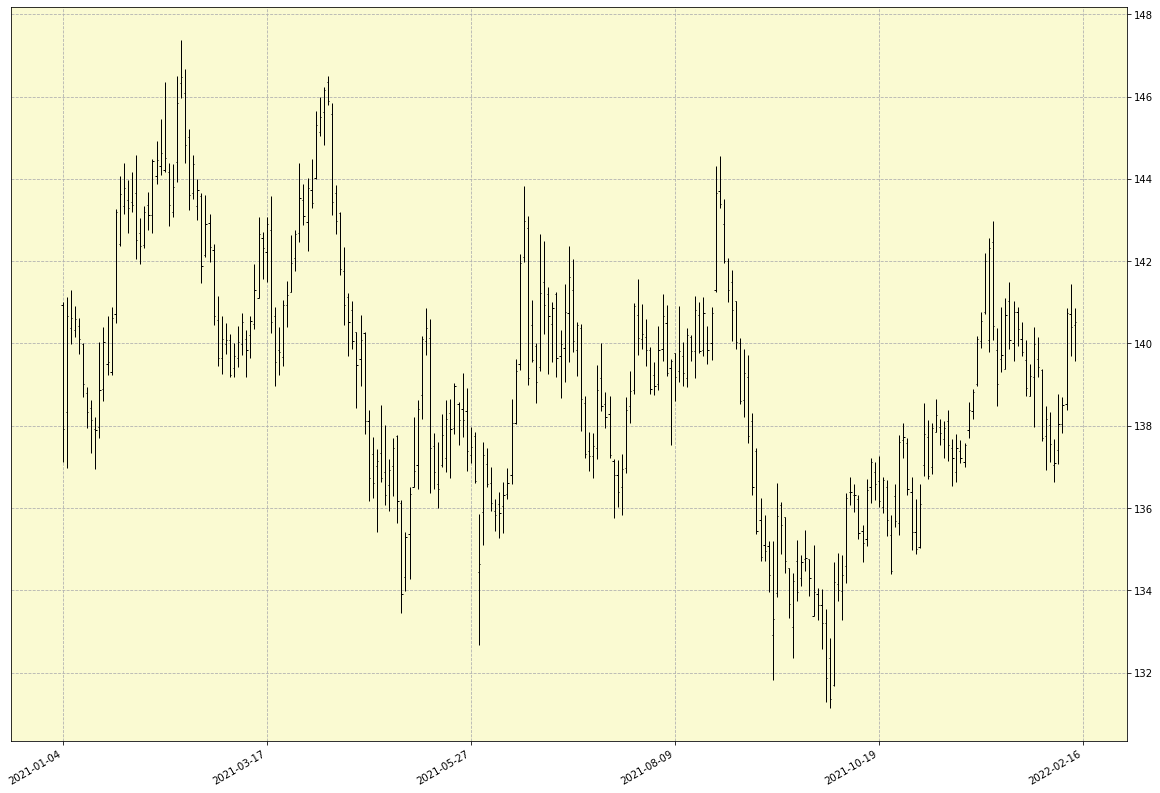

In [66]:
quotes = instruments['LC'].quotes()
view(quotes['2021-01-01':'2021-12-28'], size=(20,15))